# Descripción General del Notebook: Análisis de Wikipedia

Este Jupyter Notebook proporciona una serie de herramientas para analizar y visualizar la semántica y el contexto de palabras específicas utilizando datos de Wikipedia.



### Importación de Bibliotecas
Este bloque de código importa todas las bibliotecas necesarias para el análisis de texto, incluyendo `wikipedia` para acceder a artículos de Wikipedia, `gensim` para modelar temas y lenguaje, `nltk` para el procesamiento de texto, y `spacy` para tareas avanzadas de NLP.


In [6]:
import wikipedia
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import string
import nltk
import spacy 

### Búsqueda y Resumen de Wikipedia
Aquí configuramos la API de Wikipedia para buscar en inglés y realizamos una búsqueda para encontrar artículos relacionados con "Murciélago". Posteriormente, extraemos y mostramos un resumen del artículo sobre el murciélago como animal.


In [4]:
wikipedia.set_lang("en")
print("Todos los resultados con la palabra Murciélago: ", wikipedia.search("Bat"))
summary = wikipedia.summary('Bat (animal)')
print(summary)


Todos los resultados con la palabra Murciélago:  ['Bat', 'BAT', 'At bat', 'Batman', 'The Bat!', 'Bar and bat mitzvah', 'Baseball bat', 'Bat Masterson', 'Batting (cricket)', 'Bat Lash']
Bats are flying mammals of the order Chiroptera (). With their forelimbs adapted as wings, they are the only mammals capable of true and sustained flight. Bats are more agile in flight than most birds, flying with their very long spread-out digits covered with a thin membrane or patagium. The smallest bat, and arguably the smallest extant mammal, is Kitti's hog-nosed bat, which is 29–34 millimetres (1+1⁄8–1+3⁄8 inches) in length, 150 mm (6 in) across the wings and 2–2.6 g (1⁄16–3⁄32 oz) in mass. The largest bats are the flying foxes, with the giant golden-crowned flying fox (Acerodon jubatus) reaching a weight of 1.6 kg (3+1⁄2 lb) and having a wingspan of 1.7 m (5 ft 7 in).
The second largest order of mammals after rodents, bats comprise about 20% of all classified mammal species worldwide, with over 1,4

### Desambiguación de Palabras
Utilizamos el algoritmo de Lesk adaptado para desambiguar el sentido de la palabra "Bat" en el contexto de su uso en el artículo de Wikipedia, ayudando a identificar la definición más precisa en este contexto.


In [5]:
from pywsd.lesk import adapted_lesk
document = wikipedia.summary('Bat (animal)')
word = 'Bat'
document = document.lower()
word = word.lower()
resultado = adapted_lesk(document,word)
print(resultado.definition())

Warming up PyWSD (takes ~10 secs)... took 5.861729621887207 secs.


nocturnal mouselike mammal with forelimbs modified to form membranous wings and anatomical adaptations for echolocation by which they navigate


### Procesamiento de Texto con Spacy
Este bloque define funciones para procesar textos utilizando `spacy`, filtrando por tipos de palabras y extrayendo lemas, lo cual es útil para la limpieza y preparación de datos para análisis más complejos.


In [24]:
nlp = spacy.load('en_core_web_sm')

def process(cadena, nlp):
    doc = nlp(cadena)    
    stopWords = ["SCONJ", "CCONJ", "ADP", "DET", "PRON"]
    
    # Filtrar tokens por tipo y caracteres permitidos (letras y números)
    lemmas = [token.lemma_ for token in doc if token.pos_ not in stopWords and token.is_alpha or token.is_digit]

    return ' '.join(lemmas)


def procesarCorpus(corpus,nlp):

    corpusProcesado = list()

    for noticia in corpus:
        corpusProcesado.append(process(noticia, nlp))
    
    return corpusProcesado

### División y Procesamiento del Texto
Aquí dividimos el resumen del artículo en oraciones y las procesamos utilizando las funciones definidas anteriormente para preparar los datos para el modelado.


In [25]:
document = wikipedia.summary('Bat (animal)').split('\n')
print('El número de sentencias es:', len(document))

El número de sentencias es: 4


### Creación de Corpus Sense
Creamos un corpus etiquetado según el sentido y la categoría gramatical de cada palabra. Este corpus será la base para entrenar el modelo Word2Vec.


In [26]:
sentences = procesarCorpus(document, nlp)
sentences

['bat be fly mammal order Chiroptera forelimb adapt wing be only mammal capable true sustained flight bat be more agile flight most bird fly very long spread digit cover thin membrane patagium small bat arguably small extant mammal be Kitti hog nosed bat be millimetre 1 inch length 150 mm 6 wing g oz mass large bat be fly fox giant golden crown flying fox Acerodon jubatus reach weight kg 3 lb have wingspan m 5 ft 7 in',
 'second large order mammal rodent bat comprise about 20 classify mammal specie worldwide specie be traditionally divide two suborder largely fruit eat megabat echolocate microbat more recent evidence have support divide order Yinpterochiroptera Yangochiroptera megabat member former several specie microbat many bat be insectivore most rest be frugivore fruit eater nectarivores nectar eater few specie feed animal other insect example vampire bat feed blood Most bat be nocturnal many roost cave other refuge be uncertain bat have behaviour to escape predator bat be present

### Entrenamiento de un Modelo Word2Vec
Este bloque de código entrena un modelo Word2Vec utilizando el corpus previamente procesado para aprender representaciones vectoriales de las palabras.


In [27]:
docs = []
count = 0
for item in sentences:
    docs.append(nlp(item))
    count += 1
sense_corpus = [[x.text+"_"+x.pos_ for x in y] for y in docs]
print(sense_corpus)

[['bat_NOUN', 'be_AUX', 'fly_VERB', 'mammal_ADJ', 'order_NOUN', 'Chiroptera_PROPN', 'forelimb_NOUN', 'adapt_ADJ', 'wing_NOUN', 'be_VERB', 'only_ADV', 'mammal_ADJ', 'capable_ADJ', 'true_ADJ', 'sustained_ADJ', 'flight_NOUN', 'bat_NOUN', 'be_AUX', 'more_ADV', 'agile_ADJ', 'flight_NOUN', 'most_ADJ', 'bird_NOUN', 'fly_VERB', 'very_ADV', 'long_ADJ', 'spread_NOUN', 'digit_NOUN', 'cover_VERB', 'thin_ADJ', 'membrane_NOUN', 'patagium_NOUN', 'small_ADJ', 'bat_NOUN', 'arguably_ADV', 'small_ADJ', 'extant_ADJ', 'mammal_NOUN', 'be_AUX', 'Kitti_PROPN', 'hog_NOUN', 'nosed_ADJ', 'bat_NOUN', 'be_VERB', 'millimetre_NOUN', '1_NUM', 'inch_NOUN', 'length_NOUN', '150_NUM', 'mm_NUM', '6_NUM', 'wing_NOUN', 'g_NOUN', 'oz_ADP', 'mass_ADV', 'large_ADJ', 'bat_NOUN', 'be_AUX', 'fly_VERB', 'fox_ADJ', 'giant_ADJ', 'golden_ADJ', 'crown_NOUN', 'flying_VERB', 'fox_PROPN', 'Acerodon_PROPN', 'jubatus_PROPN', 'reach_VERB', 'weight_NOUN', 'kg_PROPN', '3_NUM', 'lb_ADV', 'have_VERB', 'wingspan_PROPN', 'm_PROPN', '5_NUM', 'ft_P

### Búsqueda de Palabras Similares
Utilizando el modelo Word2Vec entrenado, buscamos las palabras más cercanas semánticamente a "bat", lo cual es útil para entender contextos y relaciones entre palabras.


In [28]:
from gensim.models import Word2Vec
model = Word2Vec(sense_corpus, min_count = 1, workers = 3, window = 5, sg = 1)

In [38]:
print('Las 10 palabras más cercanas a "Bat" son: ', model.wv.most_similar('bat_NOUN'))

Las 10 palabras más cercanas a "Bat" son:  [('about_ADV', 0.3049136996269226), ('pollinate_NOUN', 0.2988911271095276), ('consume_NOUN', 0.28291282057762146), ('giant_ADJ', 0.25845304131507874), ('use_VERB', 0.25531020760536194), ('fly_VERB', 0.23640739917755127), ('exception_NOUN', 0.23570294678211212), ('Asia_PROPN', 0.2245289534330368), ('only_ADV', 0.22212781012058258), ('feed_NOUN', 0.22030797600746155)]


### Reducción de Dimensionalidad y Visualización
Reducimos la dimensionalidad de los vectores de palabras a 2 dimensiones usando t-SNE y visualizamos estos datos en un gráfico para explorar visualmente las relaciones entre palabras.


In [31]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling


def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

In [32]:
x_vals, y_vals, labels = reduce_dimensions(model)

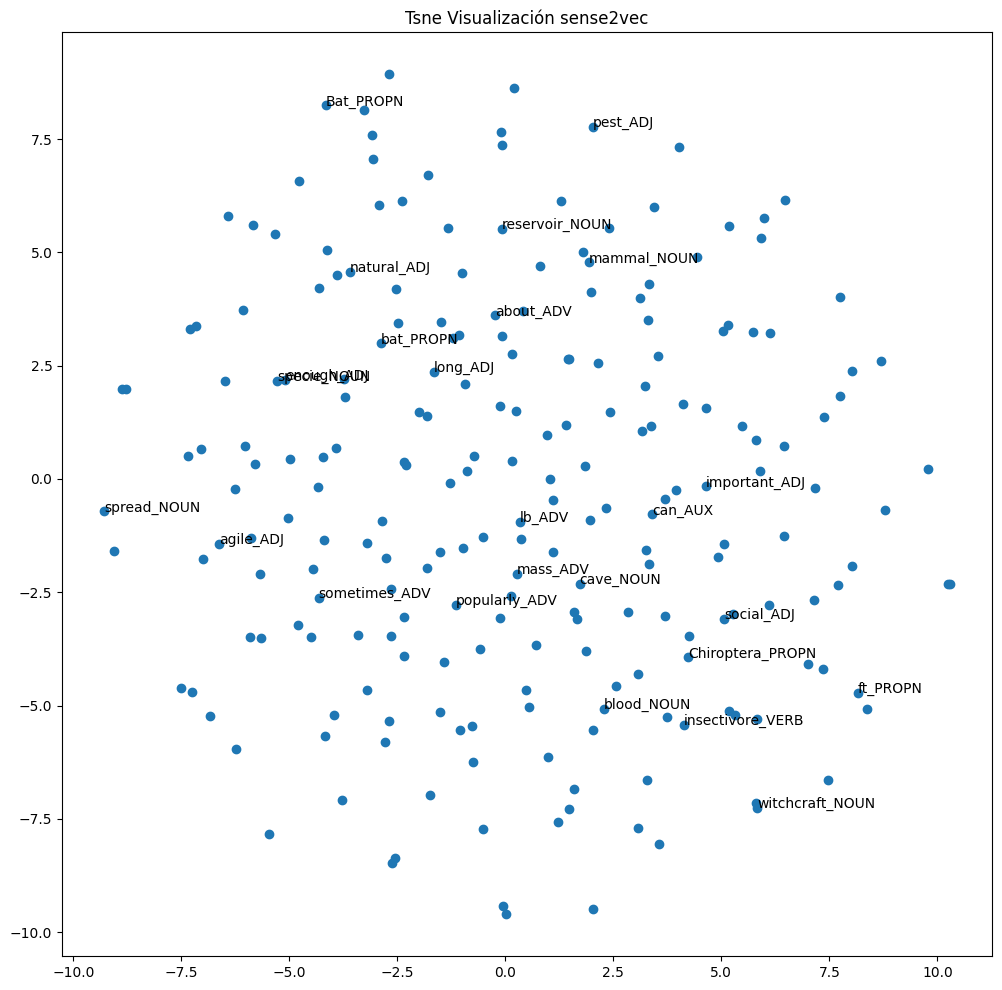

In [33]:
import matplotlib.pyplot as plt
import random

def plot_with_matplotlib(x_vals, y_vals, labels):
    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))
    plt.title('Tsne Visualización sense2vec')
    plt.show()

plot_with_matplotlib(x_vals, y_vals, labels)